#### 01.파트1 (AARRR Framework, 문제 01~09)
- (상황) 여러분은 E-commere  플랫폼 기업에 입사했습니다. 데이터사이언티스트의 역할로 비즈니스 지표를 정의하고 분석보고서를 내는 프로젝트에 참여하게 되었습니다.
- Datasource : https://archive.ics.uci.edu/dataset/502/online+retail+ii


In [1]:
# 엑셀 파일이던데 엑셀 여는 패키지(openpyxl) 있는지 점검
# openpyxl 설치되어 있네?!
# 1. openpyxl(확인)
import importlib.util
package_name = 'openpyxl'

if importlib.util.find_spec(package_name) is not None:
  print(f"{package_name} is installed.")
else:
  print(f"{package_name} is Not installed.")

# 원래 제일 쉬운건
# !pip install openpyxl 실행하는 것임

openpyxl is installed.


In [2]:
import time
import pandas as pd

# 시작시간?
start_time = time.time()

# 1. 다운로드 전에 같은 zip파일 강제 삭제! (세션마다)
!rm -f 'online+retail+ii.zip'

# 2. wget으로 zip 파일 다운로드
!wget https://archive.ics.uci.edu/static/public/502/online+retail+ii.zip
download_time = time.time()

# 3. 압축 풀기
!unzip -o 'online+retail+ii.zip' # -o(overwrite) 덮어쓰기(colab에서 런타임 끊겨서 재실행할 때마다 덮어쓰기)
unzip_time = time.time()

# wget / unzip은 colab session 이 살아있는 동안 활용하기 위한 목적
# (이 부분은 chatgpt의 조언을 받았습니다.)

# 4. 데이터로드
# data = pd.read_excel('online_retail_II.xlsx') # '파일명.xlsx'  # 로드하는데 53초? (판다스로 부르면.. 시트 하나만 들고옴!)

xls = pd.ExcelFile('online_retail_II.xlsx')
# 시트 이름 확인
sheet_names = xls.sheet_names

# 각 시트를 읽어서 리스트에 저장
df_list = []

for name in sheet_names: # sheet별 이름이 있는데..(2개인걸 알지만..)
    df = xls.parse(name)
    df_list.append(df)

# 모든 시트를 하나로 합치기
data = pd.concat(df_list, ignore_index=True) # column명 같으므로.. pd.concat바로 적용

end_time = time.time()

print(f"다운로드시간: {download_time - start_time: .2f}초")
print(f"압축풀기시간: {unzip_time - start_time : .2f}초")
print(f"파일로드시간: {end_time - start_time : .2f}초")


--2025-04-29 05:01:31--  https://archive.ics.uci.edu/static/public/502/online+retail+ii.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail+ii.zip’

online+retail+ii.zi     [       <=>          ]  43.51M  30.8MB/s    in 1.4s    

2025-04-29 05:01:33 (30.8 MB/s) - ‘online+retail+ii.zip’ saved [45622418]

Archive:  online+retail+ii.zip
 extracting: online_retail_II.xlsx   
다운로드시간:  2.02초
압축풀기시간:  2.42초
파일로드시간:  114.90초


In [ ]:
xls = pd.Excelfile()

- 데이터 로드하는데 약 115초 걸림(50메가바이트, 100만행)
  - (참고) : 만약 세션이 끊어져서 다시 해당 블록을 실행하면, 캐싱 등으로 약 2초 만에 실행됨
  - 공정한 비교를 위해서는 '런타임>세션 다시 시작'을 통해, 메모리 상에 남아 있는 파일, 캐싱 제거하여 colab의 가상머신을 초기화 해야 함
- 로컬 노트북(약 118초)
  - CPU : Intel Core i5-1240P (12th Gen)
    - 성능코어(P-core) 4개 : 하이퍼스레딩 지원 (1코어 당 2스레드)
    - 효율코어(E-core) 8개 : 하이퍼스레딩 미지원 (1코어 당 1스레드)
  - Memory(RAM) : 8GB
- Colab 환경 체크
  - 코어 수 : 1 물리코어, 2 논리코어
  - 총 RAM : 12.67GB
  - 무료 버전 성능은 낮음
- Colab 유료 옵션
  - Pay as you go : computing 단위로 구매(그런데 설명 읽어봐도 불분명함)
    - GPU가 A100인지, H100인지, FP16, FP64에 따른 연산량인지 설명 부재
    - 특히 NVIDIA A100 GPU는 MIG(Multi-Instance GPU)라고 최대 7개까지 논리적인 코어로 분할 가능함
  - Colab Pro(Google 권장) : 월 9.99달러
  - Colab Pro+ : 월 49.99달러
  - Colab EnterPrise : 사용한 만큼 지불..

In [3]:
# colab 환경 사양 체크

import psutil
import platform

# CPU 정보
print(f"CPU: {platform.processor}")
print(f"코어 수: {psutil.cpu_count(logical=False)} 물리코어, {psutil.cpu_count(logical=True)} 논리코어")

# RAM 정보
ram = psutil.virtual_memory()
print(f"총 RAM: {ram.total / (1024 ** 3):.2f} GB")

CPU: <function processor at 0x7c740e7da340>
코어 수: 1 물리코어, 2 논리코어
총 RAM: 12.67 GB


In [4]:
# GPU 있는지 확인?
# 무료 버전은 안 붙을 때도 있음

import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  print("GPU 사용 가능", gpus)
else:
  print("GPU 사용 불가능")

GPU 사용 불가능


In [5]:
# 만약 GPU를 쓰고 싶으면
# 런타임 > 런타임 유형 변경 > 하드웨어 가속기 > GPU 설정
# 무료 버전에서는 T4 선택 가능
# 유료 버전은 A100 사용 가능

In [6]:
data.shape # 106만행!

(1067371, 8)

#### GPU 종류에 따른 차이(참고)

| GPU 종류 | MIG 지원 여부 | FP32 성능 (대략) | FP16 성능 (대략) | 비고 |
|:--------|:--------------|:----------------|:----------------|:----|
| **T4** | ❌ (MIG 안 됨) | 8.1 TFLOPS | 65 TFLOPS (TensorCore) | 서버용, 보급형 |
| **L4** | ❌ (MIG 안 됨) | 30 TFLOPS | 485 TFLOPS (TensorCore) | T4 후속, 서버용 |
| **A100 (40GB/80GB)** | ✅ (MIG 가능) | 19.5 TFLOPS (FP32) | 156 TFLOPS (FP16 TensorCore) | HPC/AI 초고성능 |
| **H100 (80GB)** | ✅ (MIG 가능) | 51 TFLOPS (FP32) | 1000 TFLOPS (FP16 TensorCore) | Hopper 아키텍처 |

#### 데이터에 대한 설명
- 컬럼 설명
    - `InvoiceNo`: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
    - `StockCode`: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
    - `Description`: Product (item) name. Nominal.
    - `Quantity`: The quantities of each product (item) per transaction. Numeric.
    - `InvoiceDate`: Invice date and time. Numeric. The day and time when a transaction was generated.
    - `UnitPrice`: Unit price. Numeric. Product price per unit in sterling (Â£).
    - `CustomerID`: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
    - `Country`: Country name. Nominal. The name of the country where a customer resides.

#### 문제1. 데이터 로드 및 탐색
- 문제1-1 : 데이터 확인(5개)
- 문제1-2 : 컬럼 정보 확인, 결측치 확인 전처리 전략 고민


In [6]:
# 문제1-1)
# 첫 행 다섯개?

data.head(n=5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [8]:
# 문제1-2)
# 컬럼정보 확인

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


#### 문제1-2) 전처리 전략 고민?
- 중복된 데이터 체크(1,067,371개 중에서 34,335개 제거)
  - 'cleaned_data'로 저장하고 이것 기준으로 분석!
- Customer ID : float64가 아니라 integer 형으로!
- Customer ID 결측치 제거


In [55]:
# 데이터 중복 처리!
print(f"전체 데이터 수: {len(data)}")
print(f"중복된 데이터 수: {data.duplicated().sum()}")

data_cleaned = data.drop_duplicates() # 중복 제거한 세이터 셋을 'data_cleaned'라고 따로 저장!
data_cleaned = data_cleaned.reset_index(drop=True) # 중복 제거 후, 인덱스 0부터 재부여!

print(f"중복 제거 후 데이터 수: {len(data_cleaned)}")
print(f"제거 전후 데이터 수 차이: {len(data)-len(data_cleaned)} 개")

전체 데이터 수: 1067371
중복된 데이터 수: 34335
중복 제거 후 데이터 수: 1033036
제거 전후 데이터 수 차이: 34335 개


In [56]:
# 중복된 데이터 체크!
dup_data = data[data.duplicated(keep=False)] # 중복된 데이터만 추출!
dup_data = dup_data.sort_values(by=['Invoice', 'StockCode','Description','Price','Quantity'])
print(dup_data.head())

    Invoice StockCode                       Description  Quantity  \
379  489517     21491   SET OF THREE VINTAGE GIFT WRAPS         1   
391  489517     21491   SET OF THREE VINTAGE GIFT WRAPS         1   
365  489517     21821  GLITTER STAR GARLAND WITH BELLS          1   
386  489517     21821  GLITTER STAR GARLAND WITH BELLS          1   
363  489517     21912          VINTAGE SNAKES & LADDERS         1   

            InvoiceDate  Price  Customer ID         Country  
379 2009-12-01 11:34:00   1.95      16329.0  United Kingdom  
391 2009-12-01 11:34:00   1.95      16329.0  United Kingdom  
365 2009-12-01 11:34:00   3.75      16329.0  United Kingdom  
386 2009-12-01 11:34:00   3.75      16329.0  United Kingdom  
363 2009-12-01 11:34:00   3.75      16329.0  United Kingdom  


In [57]:
# 원본 데이터 체크
data[(data['Invoice']==489517) &
     (data['StockCode']==21491) &
     (data['Description']=='SET OF THREE VINTAGE GIFT WRAPS') &
     (data['Quantity']==1) &
     (data['InvoiceDate']=='2009-12-01 11:34:00') &
     (data['Price']==1.95)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
379,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom
391,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom


In [58]:
# 중복 제거 데이터 체크!
data_cleaned[(data_cleaned['Invoice']==489517) &
     (data_cleaned['StockCode']==21491) &
     (data_cleaned['Description']=='SET OF THREE VINTAGE GIFT WRAPS') &
     (data_cleaned['Quantity']==1) &
     (data_cleaned['InvoiceDate']=='2009-12-01 11:34:00') &
     (data_cleaned['Price']==1.95)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
378,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom


In [59]:
data_cleaned.info()
## 결측치
# Description.. 결측이어도 큰 문제X 것으로 판단?
# Customer ID.. 고객ID가 없다면... 이건 제거해야 할듯!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033036 entries, 0 to 1033035
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1033036 non-null  object        
 1   StockCode    1033036 non-null  object        
 2   Description  1028761 non-null  object        
 3   Quantity     1033036 non-null  int64         
 4   InvoiceDate  1033036 non-null  datetime64[ns]
 5   Price        1033036 non-null  float64       
 6   Customer ID  797885 non-null   float64       
 7   Country      1033036 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 63.1+ MB


In [60]:
data_cleaned.isna().mean()
# Customer ID 결측치 제거! (22.76%)

,0
Invoice,0.000000
StockCode,0.000000
Description,0.004138
Quantity,0.000000
InvoiceDate,0.000000
Price,0.000000
Customer ID,0.227631
Country,0.000000


In [61]:
data_cleaned = data_cleaned.dropna(subset=['Customer ID'])
data_cleaned = data_cleaned.reset_index(drop=True) # 행 제거 후, 인덱스 0부터 맞출 것!

In [62]:
len(data_cleaned) # 797,885 (235151개 행 제거됨)!

797885

In [63]:
# 다시 결측치 체크!

data_cleaned.isna().mean() # 이제 결측치 없음을 확인!

,0
Invoice,0.0
StockCode,0.0
Description,0.0
Quantity,0.0
InvoiceDate,0.0
Price,0.0
Customer ID,0.0
Country,0.0


In [64]:
data_cleaned['Invoice'].nunique() # Invoice 44,876개?

44876

In [65]:
data['StockCode'].nunique() # Stock-code 5,305개!

5305

<Axes: ylabel='Quantity'>

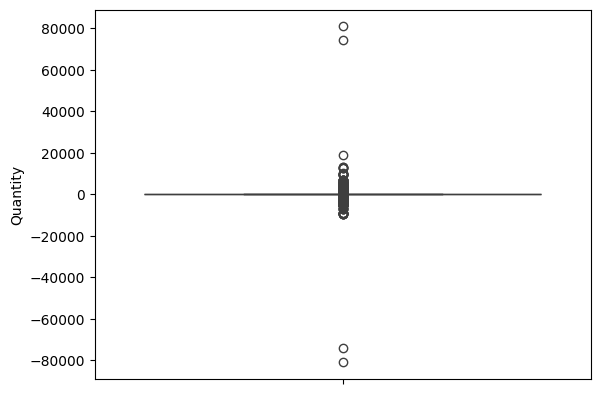

In [66]:
import seaborn as sns

sns.boxplot(data['Quantity']) # Quantity가 음수면 취소한건가?

#### 문제2. 데이터 전처리
- **`InvoiceDate`** 컬럼을 날짜 형식으로 변환하고, **`Customer ID`**에 결측치가 있는 행을 제거하세요.
- **`Customer ID`**를 정수형으로 변환한 후, **`InvoiceDate`**를 기준으로 데이터를 정렬하세요.
- 금액을 나타내는 새로운 컬럼 **`Total`** 을 생성하세요 (`Quantity`와 `Price`를 곱한 값).

In [73]:
# Customer ID 결측치 제거 했으므로..
# InvoiceDate 날짜 형식 변환! (이미 날짜형식이지만..)
# 날짜를 추가하란 의미인듯?

# data_cleaned['InvoiceDate'].dt.date # 날짜 형식이면 이게 맞을 것 같은데..

data_cleaned['InvoiceDate_DT'] = pd.to_datetime(data_cleaned['InvoiceDate'])

In [74]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797885 entries, 0 to 797884
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Invoice         797885 non-null  object        
 1   StockCode       797885 non-null  object        
 2   Description     797885 non-null  object        
 3   Quantity        797885 non-null  int64         
 4   InvoiceDate     797885 non-null  datetime64[ns]
 5   Price           797885 non-null  float64       
 6   Customer ID     797885 non-null  float64       
 7   Country         797885 non-null  object        
 8   InvoiceDate_DT  797885 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 54.8+ MB


In [75]:
# customer ID 정수형 변환
# InvoiceDate 기준 데이터 정렬

data_cleaned['Customer ID'] = data_cleaned['Customer ID'].astype(int) # 정수형 변환!
data_cleaned.sort_values('InvoiceDate').reset_index(drop=True)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01 07:45:00
...,...,...,...,...,...,...,...,...,...
797880,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,2011-12-09 12:50:00
797881,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,2011-12-09 12:50:00
797882,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680,France,2011-12-09 12:50:00
797883,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,2011-12-09 12:50:00


In [76]:
data_cleaned.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01 07:45:00


In [78]:
# 금액 나타내는 Total?

data_cleaned['Total'] = data_cleaned['Quantity'] * data_cleaned['Price']

In [81]:
data_cleaned.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01 07:45:00,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01 07:45:00,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01 07:45:00,30.0


#### 문제3
- Country컬럼 기준, Customer ID의 유니크한 값 계산!(나라별 구매 고객 수 시각화)

In [83]:
data_cleaned['Country'].nunique() # 41개 국가

41

In [84]:
data_cleaned['Customer ID'].nunique() # 5942명!

5942

In [99]:
temp = data_cleaned.groupby('Country')['Customer ID'].nunique().sort_values(ascending = False) # 내림차순(많은 순서대로)
temp.head(n=5)

,Customer ID
Country,
United Kingdom,5410
Germany,107
France,95
Spain,41
Belgium,29


In [102]:
# 시각화 위해 데이터프레임으로 변환
temp = pd.DataFrame(temp)

In [112]:
temp.head()

,Customer ID
Country,
United Kingdom,5410
Germany,107
France,95
Spain,41
Belgium,29


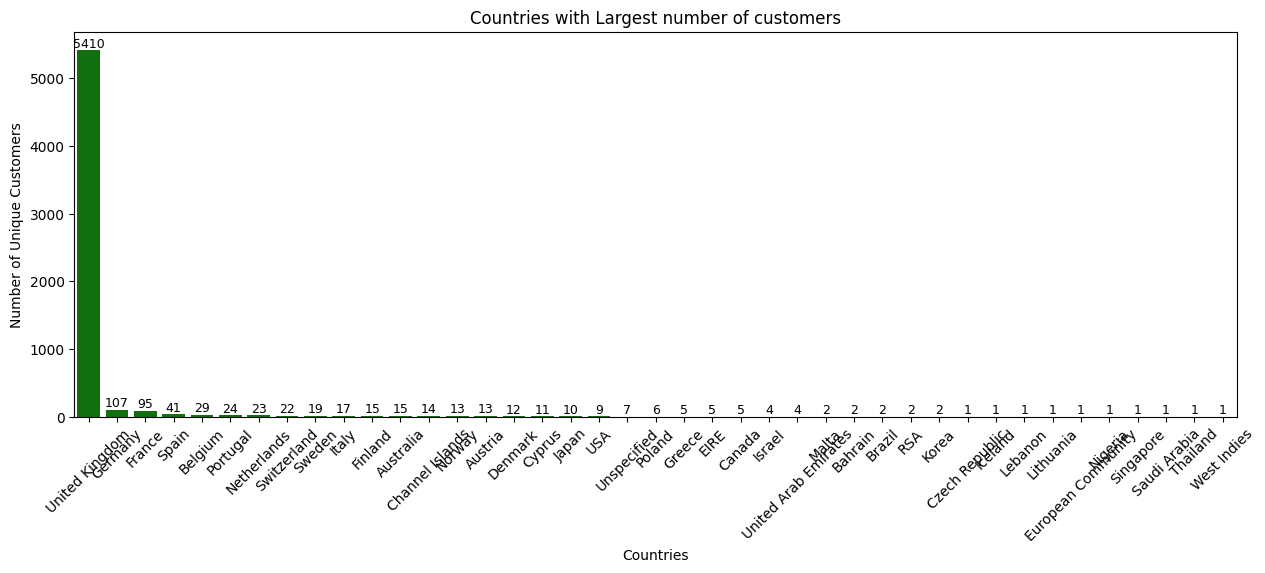

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))

ax = sns.barplot(data = temp, x='Country',y='Customer ID',color ='green')

## (barplot위 값 표시하는 코드는 검색하다 못찾아서, Chatgpt에게 물어봄)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')

plt.xlabel('Countries')
plt.ylabel('Number of Unique Customers')
plt.title('Countries with Largest number of customers')
plt.xticks(rotation=45)
plt.show()

#### 문제4
- 신규 고객 분석을 위해 고객의 **첫 구매 시점**을 기준으로 월별 신규 유입 고객 수를 계산하세요.
- 각 고객의 첫 구매 날짜를 추출하고, **월별 신규 고객 수**를 시각화하세요.

In [116]:
# 고객별 첫 구매일자?
first_purchase = data_cleaned.groupby('Customer ID')['InvoiceDate'].min()
first_purchase.head()

,InvoiceDate
Customer ID,
12346,2009-12-14 08:34:00
12347,2010-10-31 14:20:00
12348,2010-09-27 14:59:00
12349,2009-12-04 12:49:00
12350,2011-02-02 16:01:00


In [117]:
first_purchase_month = first_purchase.dt.to_period('M') # dt형태 자료 YYYY-MM?
first_purchase_month.head()

,InvoiceDate
Customer ID,
12346,2009-12
12347,2010-10
12348,2010-09
12349,2009-12
12350,2011-02


In [120]:
# 신규고객수
new_customers_per_month = first_purchase_month.value_counts().sort_index()
new_customers_per_month.head()

new_customers_per_month = pd.DataFrame(new_customers_per_month).reset_index()

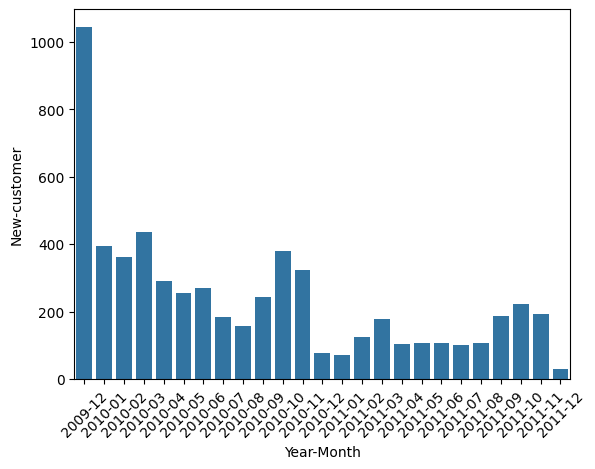

In [124]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data = new_customers_per_month, x='InvoiceDate',y='count')
plt.xlabel('Year-Month')
plt.ylabel('New-customer')
plt.xticks(rotation = 45)
plt.show()


#### 문제5
- 모든 고객 중 첫 구매 이후 총 구매 금액이 특정 기준 금액 (£50) 이상인 고객을 활성화된 고객으로 정의합니다.
- 전체 고객 수와 활성화된 고객 수를 비교하여 활성화율을 도출하세요.

In [143]:
# 고객별 첫 구매 시점부터 계산?

first_purchase_date = data_cleaned.groupby('Customer ID')['InvoiceDate'].min()
first_purchase_date = first_purchase_date.reset_index()
first_purchase_date.columns = ['Customer ID', 'FirstPurchaseDate']

data_cleaned = data_cleaned.merge(first_purchase_date, on='Customer ID', how='left') # 덮어썼으니 두 번 실행되면 조심해야 함!

data_cleaned.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,Total,FirstPurchaseDate
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01 07:45:00,83.4,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01 07:45:00,100.8,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01 07:45:00,30.0,2009-12-01 07:45:00


In [150]:
# 고객별 총 구매액?

customer_total = data_cleaned.groupby('Customer ID')['Total'].sum()

## 고객별 첫 번째 구매데이터

# first_purchase_records = data_cleaned[data_cleaned['InvoiceDate'] == data_cleaned['FirstPurchaseDate']]
# # first_purchase_records.shape # 약 13만8천건?!

# # 첫 번째 구매데이터?
# customer_first = first_purchase_records.groupby('Customer ID')['Total'].sum()

# customer_post_first = customer_total - customer_first

In [151]:
activated_customers = customer_total[customer_total >= 50].shape[0]
activation_rate = (activated_customers / total_customers) * 100

print(f"총 고객 수: {total_customers}")
print(f"활성화된 고객 수(첫 구매 후 50 파운드 이상): {activated_customers}")
print(f"고객 활성화율: {activation_rate:.2f}%")

# 중복제거 여부 고려하면 거의 같은 숫자!
# 그런데 코호트 분석에서는.. 당연히 최초 시점도 포함해서 계산하는게 맞지만
# 문제에서는 ~'이후'라고 되어있어서... 이 부분을 빼고 계산하는 시행착오가 있었음
# 코호트 분석에 대해서 복습 필요

총 고객 수: 5942
활성화된 고객 수(첫 구매 후 50 파운드 이상): 5774
고객 활성화율: 97.17%


### **문제 6: Retention:코호트 분석(고객)**

- 분기별 활성 사용자(MAU)를 분석하여 고객 유지 현황을 파악하세요.
- 분기별 활성 고객 수를 계산하고, 이를 시각화하여 **고객 유지 트렌드**를 분석하세요.

In [165]:
# YYYY_MM column이 일단 필요할 듯!
# 그리고 분기 필요

data_cleaned['current_month'] = pd.to_datetime(data_cleaned['InvoiceDate']).dt.year.map(str) + "-" + pd.to_datetime(data_cleaned['InvoiceDate']).dt.month.map(str)
data_cleaned['InvoiceQuarter'] = data_cleaned['InvoiceDate'].dt.to_period('Q')
data_cleaned['FirstPurchaseQuarter'] = data_cleaned['FirstPurchaseDate'].dt.to_period('Q')
data_cleaned.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,Total,FirstPurchaseDate,current_month,InvoiceQuarter,FirstPurchaseQuarter
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01 07:45:00,83.4,2009-12-01 07:45:00,2009-12,2009Q4,2009Q4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0,2009-12-01 07:45:00,2009-12,2009Q4,2009Q4
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0,2009-12-01 07:45:00,2009-12,2009Q4,2009Q4
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01 07:45:00,100.8,2009-12-01 07:45:00,2009-12,2009Q4,2009Q4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01 07:45:00,30.0,2009-12-01 07:45:00,2009-12,2009Q4,2009Q4


In [195]:
data_for_cohort = data_cleaned[['Customer ID','InvoiceQuarter','FirstPurchaseQuarter']]
# 중복 제거, 한 고객이 여러 번 주문한 경우!
data_for_cohort = data_for_cohort.drop_duplicates()
data_for_cohort.head()

,Customer ID,InvoiceQuarter,FirstPurchaseQuarter
0,13085,2009Q4,2009Q4
12,13078,2009Q4,2009Q4
31,15362,2009Q4,2009Q4
54,18102,2009Q4,2009Q4
71,12682,2009Q4,2009Q4


In [196]:
cohort_data = data_for_cohort.groupby(['FirstPurchaseQuarter', 'InvoiceQuarter']).agg({'Customer ID': 'nunique'}).rename(columns={'Customer ID': 'CustomerCount'}).reset_index()
cohort_data.head()

,FirstPurchaseQuarter,InvoiceQuarter,CustomerCount
0,2009Q4,2009Q4,1045
1,2009Q4,2010Q1,673
2,2009Q4,2010Q2,688
3,2009Q4,2010Q3,619
4,2009Q4,2010Q4,714


In [197]:
# 두 분기의 차이를 계산하는 함수
def quarter_diff(x, y):
    return (y.year - x.year) * 4 + (y.quarter - x.quarter) # 1년은 4분기

# Quarter 차이 컬럼 추가
cohort_data['Period'] = cohort_data.apply(
    lambda row: quarter_diff(row['FirstPurchaseQuarter'], row['InvoiceQuarter']),
    axis=1
)

In [202]:
cohort_pivot = cohort_data.pivot(index='FirstPurchaseQuarter',
                                 columns='Period',
                                 values='CustomerCount')

In [203]:
cohort_pivot.head()

Period,0,1,2,3,4,5,6,7,8
FirstPurchaseQuarter,,,,,,,,,
2009Q4,1045.0,673.0,688.0,619.0,714.0,525.0,517.0,509.0,572.0
2010Q1,1193.0,610.0,573.0,608.0,416.0,431.0,444.0,408.0,NaN
2010Q2,814.0,324.0,348.0,183.0,245.0,227.0,244.0,NaN,NaN
2010Q3,583.0,281.0,148.0,155.0,192.0,188.0,NaN,NaN,NaN
2010Q4,778.0,168.0,196.0,162.0,275.0,NaN,NaN,NaN,NaN


In [204]:
cohort_size = cohort_pivot.iloc[:, 0]  # 0개월차 기준
retention = cohort_pivot.divide(cohort_size, axis=0) * 100

In [205]:
cohort_size.head()

,0
FirstPurchaseQuarter,
2009Q4,1045.0
2010Q1,1193.0
2010Q2,814.0
2010Q3,583.0
2010Q4,778.0


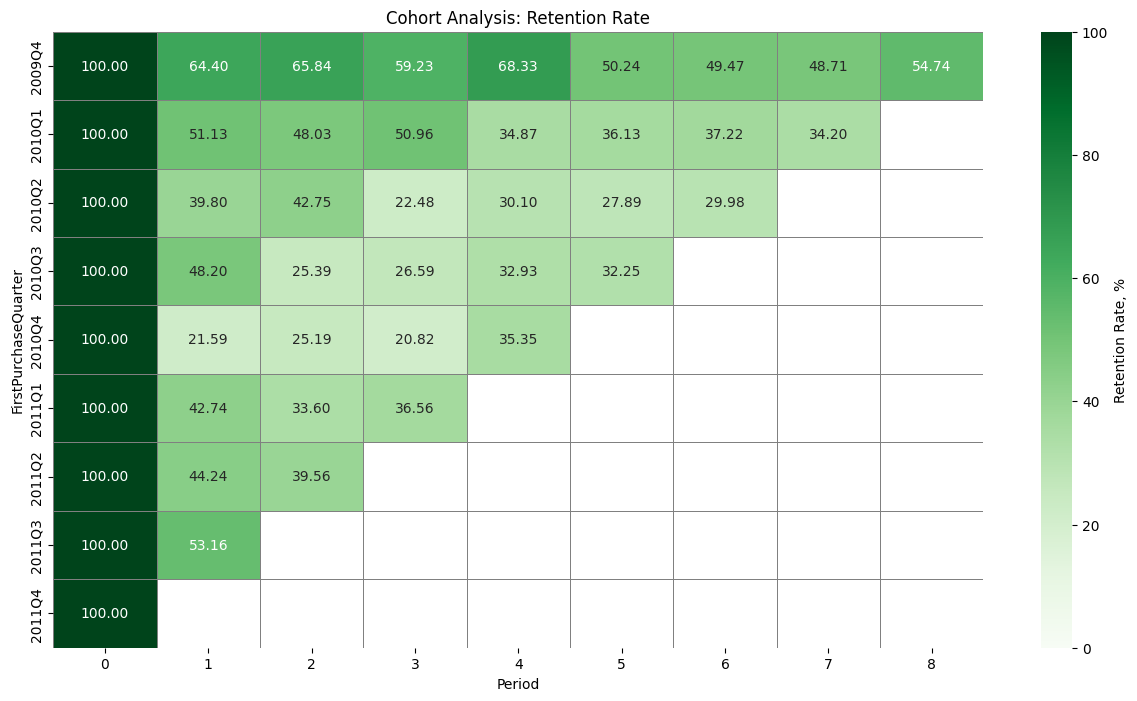

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.heatmap(data=retention,
            annot=True,
            fmt='.2f',
            cmap='Greens',
            cbar_kws={'label': 'Retention Rate, %'},
            linewidths=0.5,
            linecolor='gray',
            vmin=0, vmax=100)
plt.title('Cohort Analysis: Retention Rate')
plt.show()

### **문제 6-2 분기별 활성 고객 수**
- 분기별 활성 고객 수를 계산하고, 이를 시각화하여 고객 유지 트렌드를 분석

In [211]:
# data_cleaned.head()
# InvoiceQuarter 별로..
# 구매액이..50파운드(Total)넘는 고객?
# Customer_ID는 중복이 없도록

active_customers = data_cleaned.groupby('InvoiceQuarter')['Customer ID'].nunique().reset_index()
active_customers.columns = ['InvoiceQuarter', 'ActiveCustomerCount']
active_customers.head()

,InvoiceQuarter,ActiveCustomerCount
0,2009Q4,1045
1,2010Q1,1866
2,2010Q2,2112
3,2010Q3,2099
4,2010Q4,2729


### **문제 7: Retention: 코호트 분석(평균 구매수량)**

- 분기단위의 활성 사용자의 평균 구매수량을 분석하세요
    - 구매수량이기 때문에 0 index의 값이 100% 가 아닌 절대 값임을 주의

#### ** Quest3 회고(1차) **
1. 데이터 다루는 이슈
- Colab에서 데이터를 불러오고 다루는 과정에서 능숙하지 못했던 부분
- Quest자체를 푸는게 목적이면 구글 드라이브에 데이터를 직접 옮겼으면 훨씬 빨랐을 것 같다.

2. 흥미로운 주제가 있더라도 MainQuest 때는 MainQuest에만 집중하자.
- Colab 무료 버전에서 할당되는 자원량, 유료버전과의 차이, gpu 등 향후에 도움될 내용이 많았으나, 이런건 quest끝나고 했어야 했다.

3. Cohort-analysis 등 관련 개념
- Cohort 분석에 대한 개념 이해도가 매우 부족했음
- 다른 수업 주차보다 매우 어렵고 기억도 잘 안나는 부분이었고, 학습도 부족했던 것 같음.

4. Python 관련 부분
- group_by나 시각화 등, 다른 문법 요소에 대해서 숙지가 덜 되었음
